<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Cats_vs_Dogs_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Preparing Datasets

In [19]:
import os

In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!mkdir -p ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:04<00:00, 214MB/s]
100% 812M/812M [00:04<00:00, 182MB/s]


In [11]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [12]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [13]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-25 09:33:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-25 09:33:54 (87.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [14]:
from helper_functions import plot_loss_curves,walk_through_dir

In [15]:
import tensorflow as tf
import pandas as pd

In [16]:
walk_through_dir("/content/train")

There are 0 directories and 25000 images in '/content/train'.


In [18]:
IMAGE_SHAPE = (128,128)
IMAGE_CHANNEL = 3

## Preparing Training Dataset

In [22]:
filenames = os.listdir('/content/train')

In [28]:
label = []
for i in filenames:
  category_name = i.split('.')
  if category_name[0] == 'dog':
    label.append(0)
  else:
    label.append(1)
dataset = pd.DataFrame({
    "file":filenames,
    "label":label,
})

In [29]:
dataset

,file,label
0,dog.3870.jpg,0
1,dog.4663.jpg,0
2,dog.4844.jpg,0
3,cat.5287.jpg,1
4,cat.2499.jpg,1
...,...,...
24995,cat.10000.jpg,1
24996,dog.6650.jpg,0
24997,dog.11969.jpg,0
24998,dog.10162.jpg,0


In [35]:
import random
import matplotlib.pyplot as plt

In [50]:
def load_and_prep_image(filename,img_shape=224):
      img = tf.io.read_file(filename)
      img = tf.image.decode_image(img)
      img = tf.image.resize(img,[img_shape,img_shape])
      img = img/255.
      return img

In [53]:
def plot_random_image():
  filename = random.choice(filenames)
  print(filename)
  image = '/content/train/'+filename
  image = load_and_prep_image(image)
  plt.imshow(image)
  plt.axis('off')

cat.714.jpg


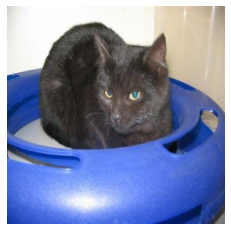

In [54]:
plot_random_image()